In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import plotly.express as px
import seaborn as sns

In [75]:
Education_Data =pd.read_csv("Resources\Education_Attainment.csv")
Education_Data

#while there is alot of good data here there are alot of problems with this table and alot of data we don't need. For starters
#since the data includes GED recipents as individuals who graduated high school and we want high school drop outs, we can
#focus in a little bit more on young people who failed to graduate high school. We also don't need any other column
#asides from the rate so we want to remove those. Additionally we need to clean the column name and remove the data table
#at the end. We also need to get rid of that first row and to get rid of the "Label(Grouping)" Index header

,Label (Grouping),Alabama!!Total!!Estimate,Alabama!!Total!!Margin of Error,Alabama!!Percent!!Estimate,Alabama!!Percent!!Margin of Error,Alabama!!Male!!Estimate,Alabama!!Male!!Margin of Error,Alabama!!Percent Male!!Estimate,Alabama!!Percent Male!!Margin of Error,Alabama!!Female!!Estimate,...,Puerto Rico!!Percent!!Estimate,Puerto Rico!!Percent!!Margin of Error,Puerto Rico!!Male!!Estimate,Puerto Rico!!Male!!Margin of Error,Puerto Rico!!Percent Male!!Estimate,Puerto Rico!!Percent Male!!Margin of Error,Puerto Rico!!Female!!Estimate,Puerto Rico!!Female!!Margin of Error,Puerto Rico!!Percent Female!!Estimate,Puerto Rico!!Percent Female!!Margin of Error
0,AGE BY EDUCATIONAL ATTAINMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Population 18 to 24 years,"468,727","±6,283",(X),(X),"232,322","±3,449",(X),(X),"236,405",...,(X),(X),"159,616","±3,010",(X),(X),"156,771","±2,385",(X),(X)
2,Less than high school graduate,"62,982","±5,794",13.4%,±1.2,"35,285","±3,998",15.2%,±1.7,"27,697",...,7.1%,±0.8,"14,065","±2,323",8.8%,±1.5,"8,510","±1,604",5.4%,±1.0
3,High school graduate (includes equival...,"170,023","±8,141",36.3%,±1.7,"92,663","±5,505",39.9%,±2.3,"77,360",...,27.4%,±1.7,"48,471","±4,013",30.4%,±2.4,"38,315","±3,627",24.4%,±2.3
4,Some college or associate's degree,"193,079","±8,068",41.2%,±1.6,"86,872","±5,237",37.4%,±2.2,"106,207",...,55.7%,±1.7,"85,107","±4,048",53.3%,±2.3,"91,107","±4,402",58.1%,±2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Less than high school graduate,"25,395","±1,256",(X),(X),"30,437","±1,459",(X),(X),"19,307",...,(X),(X),"12,194","±1,047",(X),(X),"7,500","±1,295",(X),(X)
64,High school graduate (includes equival...,"31,997",±457,(X),(X),"40,400",±671,(X),(X),"24,996",...,(X),(X),"16,384",±430,(X),(X),"13,519",±763,(X),(X)
65,Some college or associate's degree,"36,662",±602,(X),(X),"48,234","±2,017",(X),(X),"30,353",...,(X),(X),"19,618",±853,(X),(X),"15,743",±494,(X),(X)
66,Bachelor's degree,"52,385","±1,641",(X),(X),"69,340","±2,465",(X),(X),"42,797",...,(X),(X),"30,177","±2,061",(X),(X),"23,879",±869,(X),(X)


In [4]:
states = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado","Connecticut","Delaware","District of Columbia","Florida","Georgia",
          "Hawaii","Idaho","Illinois","Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland","Massachusetts",
          "Michigan","Minnesota","Mississippi","Missouri","Montana","Nebraska","Nevada","New Hampshire","New Jersey",
          "New Mexico","New York","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania","Rhode Island","South Carolina",
          "South Dakota","Tennessee","Texas","Utah", "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming","Puerto Rico"]
column_name=["Label (Grouping)"]
for state in states:
    column_name.append(state + "!!" + "Percent" + "!!"+"Estimate")
Cleaned_Columns_Education_Data=Education_Data[column_name]

Cleaned_Columns_Education_Data
#For this data set, each state had a number of columns which divided the information by gendder and included total population.
#For our purposes, we are only interested in the percentage of the total population. 

,Label (Grouping),Alabama!!Percent!!Estimate,Alaska!!Percent!!Estimate,Arizona!!Percent!!Estimate,Arkansas!!Percent!!Estimate,California!!Percent!!Estimate,Colorado!!Percent!!Estimate,Connecticut!!Percent!!Estimate,Delaware!!Percent!!Estimate,District of Columbia!!Percent!!Estimate,...,Tennessee!!Percent!!Estimate,Texas!!Percent!!Estimate,Utah!!Percent!!Estimate,Vermont!!Percent!!Estimate,Virginia!!Percent!!Estimate,Washington!!Percent!!Estimate,West Virginia!!Percent!!Estimate,Wisconsin!!Percent!!Estimate,Wyoming!!Percent!!Estimate,Puerto Rico!!Percent!!Estimate
0,AGE BY EDUCATIONAL ATTAINMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Population 18 to 24 years,(X),(X),(X),(X),(X),(X),(X),(X),(X),...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
2,Less than high school graduate,13.4%,13.2%,14.7%,11.5%,9.5%,12.3%,9.0%,12.4%,7.4%,...,10.8%,14.0%,11.3%,9.1%,8.7%,12.7%,11.1%,10.8%,11.0%,7.1%
3,High school graduate (includes equival...,36.3%,49.9%,35.9%,40.0%,34.1%,35.2%,30.9%,36.2%,21.2%,...,38.4%,36.5%,35.1%,30.8%,35.5%,34.8%,43.2%,35.8%,37.0%,27.4%
4,Some college or associate's degree,41.2%,33.4%,38.9%,38.8%,44.1%,38.4%,42.0%,42.0%,48.0%,...,38.8%,38.6%,46.1%,45.9%,41.9%,39.4%,36.0%,40.2%,42.0%,55.7%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Less than high school graduate,(X),(X),(X),(X),(X),(X),(X),(X),(X),...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
64,High school graduate (includes equival...,(X),(X),(X),(X),(X),(X),(X),(X),(X),...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
65,Some college or associate's degree,(X),(X),(X),(X),(X),(X),(X),(X),(X),...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
66,Bachelor's degree,(X),(X),(X),(X),(X),(X),(X),(X),(X),...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)


In [5]:
Cleaned_Columns_Education_Data.reset_index()
Bad_Index =[0]
for i in range(6,58):
    Bad_Index.append(i)

print(Bad_Index)
Cleaned_Columns_Rows_Education_Data=Cleaned_Columns_Education_Data.drop(Bad_Index)
#Cleaned_Columns_Rows_Education_Data =Cleaned_Columns_Education_Data
#Cleaned_Columns_Rows_Education_Data

#Because the age cohort between ages 18 and 24 are the most prone to violence we wanted to focus on them. We removed the other
#age cohorts. The previous code used to cleaning will not run after initially running as a result of the indexes being
#removed so it has been commented out.

[0, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57]


In [6]:
Cleaned_Columns_Rows_Education_Data

,Label (Grouping),Alabama!!Percent!!Estimate,Alaska!!Percent!!Estimate,Arizona!!Percent!!Estimate,Arkansas!!Percent!!Estimate,California!!Percent!!Estimate,Colorado!!Percent!!Estimate,Connecticut!!Percent!!Estimate,Delaware!!Percent!!Estimate,District of Columbia!!Percent!!Estimate,...,Tennessee!!Percent!!Estimate,Texas!!Percent!!Estimate,Utah!!Percent!!Estimate,Vermont!!Percent!!Estimate,Virginia!!Percent!!Estimate,Washington!!Percent!!Estimate,West Virginia!!Percent!!Estimate,Wisconsin!!Percent!!Estimate,Wyoming!!Percent!!Estimate,Puerto Rico!!Percent!!Estimate
1,Population 18 to 24 years,(X),(X),(X),(X),(X),(X),(X),(X),(X),...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
2,Less than high school graduate,13.4%,13.2%,14.7%,11.5%,9.5%,12.3%,9.0%,12.4%,7.4%,...,10.8%,14.0%,11.3%,9.1%,8.7%,12.7%,11.1%,10.8%,11.0%,7.1%
3,High school graduate (includes equival...,36.3%,49.9%,35.9%,40.0%,34.1%,35.2%,30.9%,36.2%,21.2%,...,38.4%,36.5%,35.1%,30.8%,35.5%,34.8%,43.2%,35.8%,37.0%,27.4%
4,Some college or associate's degree,41.2%,33.4%,38.9%,38.8%,44.1%,38.4%,42.0%,42.0%,48.0%,...,38.8%,38.6%,46.1%,45.9%,41.9%,39.4%,36.0%,40.2%,42.0%,55.7%
5,Bachelor's degree or higher,9.1%,3.5%,10.5%,9.7%,12.2%,14.1%,18.2%,9.4%,23.4%,...,11.9%,10.9%,7.6%,14.2%,13.9%,13.0%,9.7%,13.3%,10.0%,9.7%
58,High school graduate (includes equivalency),16.5%,14.3%,13.8%,17.7%,13.9%,11.9%,12.0%,11.5%,35.5%,...,14.8%,15.0%,9.5%,12.6%,12.3%,11.9%,17.6%,12.0%,11.4%,44.9%
59,Some college or associate's degree,11.9%,8.4%,10.0%,11.2%,10.1%,8.5%,8.7%,9.1%,19.1%,...,9.9%,9.8%,7.3%,9.1%,8.3%,8.4%,12.1%,7.9%,8.5%,34.3%
60,Bachelor's degree or higher,5.1%,4.1%,4.9%,4.8%,5.3%,4.0%,3.9%,4.6%,4.0%,...,4.5%,4.6%,4.6%,4.4%,3.4%,4.3%,4.8%,3.8%,6.3%,15.3%
61,MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2021...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,Population 25 years and over with earnings,(X),(X),(X),(X),(X),(X),(X),(X),(X),...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)


In [7]:
Indexes_Cleaned_Columns_Education_Data=Cleaned_Columns_Education_Data.reset_index()
Indexes_Cleaned_Columns_Education_Data.head(6)
#Because we have a new set of indexes we reset it again, originally we wanted to investigate if rows 5-16 have usesful data.
#looking below, that seems to not be the case so we will clean those rows out as well.

,index,Label (Grouping),Alabama!!Percent!!Estimate,Alaska!!Percent!!Estimate,Arizona!!Percent!!Estimate,Arkansas!!Percent!!Estimate,California!!Percent!!Estimate,Colorado!!Percent!!Estimate,Connecticut!!Percent!!Estimate,Delaware!!Percent!!Estimate,...,Tennessee!!Percent!!Estimate,Texas!!Percent!!Estimate,Utah!!Percent!!Estimate,Vermont!!Percent!!Estimate,Virginia!!Percent!!Estimate,Washington!!Percent!!Estimate,West Virginia!!Percent!!Estimate,Wisconsin!!Percent!!Estimate,Wyoming!!Percent!!Estimate,Puerto Rico!!Percent!!Estimate
0,0,AGE BY EDUCATIONAL ATTAINMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Population 18 to 24 years,(X),(X),(X),(X),(X),(X),(X),(X),...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
2,2,Less than high school graduate,13.4%,13.2%,14.7%,11.5%,9.5%,12.3%,9.0%,12.4%,...,10.8%,14.0%,11.3%,9.1%,8.7%,12.7%,11.1%,10.8%,11.0%,7.1%
3,3,High school graduate (includes equival...,36.3%,49.9%,35.9%,40.0%,34.1%,35.2%,30.9%,36.2%,...,38.4%,36.5%,35.1%,30.8%,35.5%,34.8%,43.2%,35.8%,37.0%,27.4%
4,4,Some college or associate's degree,41.2%,33.4%,38.9%,38.8%,44.1%,38.4%,42.0%,42.0%,...,38.8%,38.6%,46.1%,45.9%,41.9%,39.4%,36.0%,40.2%,42.0%,55.7%
5,5,Bachelor's degree or higher,9.1%,3.5%,10.5%,9.7%,12.2%,14.1%,18.2%,9.4%,...,11.9%,10.9%,7.6%,14.2%,13.9%,13.0%,9.7%,13.3%,10.0%,9.7%


In [8]:
#We used itterations to remove some rows

Indexes_Cleaned_Columns_Education_Data

Bad_Index_Second_Round =[]
for i in range(6,17):
    Bad_Index_Second_Round.append(i)

#print(Bad_Index)
Cleaned_Columns_Rows_Education_Data_Two=Indexes_Cleaned_Columns_Education_Data.drop(Bad_Index_Second_Round)
Cleaned_Columns_Rows_Education_Data_Two

,index,Label (Grouping),Alabama!!Percent!!Estimate,Alaska!!Percent!!Estimate,Arizona!!Percent!!Estimate,Arkansas!!Percent!!Estimate,California!!Percent!!Estimate,Colorado!!Percent!!Estimate,Connecticut!!Percent!!Estimate,Delaware!!Percent!!Estimate,...,Tennessee!!Percent!!Estimate,Texas!!Percent!!Estimate,Utah!!Percent!!Estimate,Vermont!!Percent!!Estimate,Virginia!!Percent!!Estimate,Washington!!Percent!!Estimate,West Virginia!!Percent!!Estimate,Wisconsin!!Percent!!Estimate,Wyoming!!Percent!!Estimate,Puerto Rico!!Percent!!Estimate
0,0,AGE BY EDUCATIONAL ATTAINMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Population 18 to 24 years,(X),(X),(X),(X),(X),(X),(X),(X),...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
2,2,Less than high school graduate,13.4%,13.2%,14.7%,11.5%,9.5%,12.3%,9.0%,12.4%,...,10.8%,14.0%,11.3%,9.1%,8.7%,12.7%,11.1%,10.8%,11.0%,7.1%
3,3,High school graduate (includes equival...,36.3%,49.9%,35.9%,40.0%,34.1%,35.2%,30.9%,36.2%,...,38.4%,36.5%,35.1%,30.8%,35.5%,34.8%,43.2%,35.8%,37.0%,27.4%
4,4,Some college or associate's degree,41.2%,33.4%,38.9%,38.8%,44.1%,38.4%,42.0%,42.0%,...,38.8%,38.6%,46.1%,45.9%,41.9%,39.4%,36.0%,40.2%,42.0%,55.7%
5,5,Bachelor's degree or higher,9.1%,3.5%,10.5%,9.7%,12.2%,14.1%,18.2%,9.4%,...,11.9%,10.9%,7.6%,14.2%,13.9%,13.0%,9.7%,13.3%,10.0%,9.7%
17,17,High school graduate or higher,90.7%,93.8%,91.1%,91.8%,91.4%,94.3%,94.6%,91.3%,...,93.5%,90.0%,95.5%,96.5%,94.8%,94.0%,90.5%,94.4%,90.5%,93.7%
18,18,Bachelor's degree or higher,29.2%,29.6%,32.7%,27.1%,39.8%,47.5%,46.5%,35.9%,...,35.0%,35.3%,38.3%,50.3%,45.0%,42.8%,27.6%,37.7%,28.5%,36.9%
19,19,Population 35 to 44 years,(X),(X),(X),(X),(X),(X),(X),(X),...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
20,20,High school graduate or higher,88.4%,94.7%,88.7%,89.4%,85.3%,91.5%,90.8%,90.8%,...,90.8%,85.7%,93.0%,95.6%,92.1%,92.4%,91.0%,93.7%,93.7%,88.1%


In [9]:
Cleaned_Columns_Rows_Education_Data_Three=Cleaned_Columns_Rows_Education_Data_Two.drop(0)
Cleaned_Columns_Rows_Education_Data_Four=Cleaned_Columns_Rows_Education_Data_Three.drop(1)
Cleaned_Columns_Rows_Education_Data_Four

#dropped the "Age by Education Attainment" row because contains no data, will make note that this data is for ages 18 to 24

,index,Label (Grouping),Alabama!!Percent!!Estimate,Alaska!!Percent!!Estimate,Arizona!!Percent!!Estimate,Arkansas!!Percent!!Estimate,California!!Percent!!Estimate,Colorado!!Percent!!Estimate,Connecticut!!Percent!!Estimate,Delaware!!Percent!!Estimate,...,Tennessee!!Percent!!Estimate,Texas!!Percent!!Estimate,Utah!!Percent!!Estimate,Vermont!!Percent!!Estimate,Virginia!!Percent!!Estimate,Washington!!Percent!!Estimate,West Virginia!!Percent!!Estimate,Wisconsin!!Percent!!Estimate,Wyoming!!Percent!!Estimate,Puerto Rico!!Percent!!Estimate
2,2,Less than high school graduate,13.4%,13.2%,14.7%,11.5%,9.5%,12.3%,9.0%,12.4%,...,10.8%,14.0%,11.3%,9.1%,8.7%,12.7%,11.1%,10.8%,11.0%,7.1%
3,3,High school graduate (includes equival...,36.3%,49.9%,35.9%,40.0%,34.1%,35.2%,30.9%,36.2%,...,38.4%,36.5%,35.1%,30.8%,35.5%,34.8%,43.2%,35.8%,37.0%,27.4%
4,4,Some college or associate's degree,41.2%,33.4%,38.9%,38.8%,44.1%,38.4%,42.0%,42.0%,...,38.8%,38.6%,46.1%,45.9%,41.9%,39.4%,36.0%,40.2%,42.0%,55.7%
5,5,Bachelor's degree or higher,9.1%,3.5%,10.5%,9.7%,12.2%,14.1%,18.2%,9.4%,...,11.9%,10.9%,7.6%,14.2%,13.9%,13.0%,9.7%,13.3%,10.0%,9.7%
17,17,High school graduate or higher,90.7%,93.8%,91.1%,91.8%,91.4%,94.3%,94.6%,91.3%,...,93.5%,90.0%,95.5%,96.5%,94.8%,94.0%,90.5%,94.4%,90.5%,93.7%
18,18,Bachelor's degree or higher,29.2%,29.6%,32.7%,27.1%,39.8%,47.5%,46.5%,35.9%,...,35.0%,35.3%,38.3%,50.3%,45.0%,42.8%,27.6%,37.7%,28.5%,36.9%
19,19,Population 35 to 44 years,(X),(X),(X),(X),(X),(X),(X),(X),...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
20,20,High school graduate or higher,88.4%,94.7%,88.7%,89.4%,85.3%,91.5%,90.8%,90.8%,...,90.8%,85.7%,93.0%,95.6%,92.1%,92.4%,91.0%,93.7%,93.7%,88.1%
21,21,Bachelor's degree or higher,31.1%,34.7%,34.7%,29.3%,39.7%,47.1%,47.9%,39.3%,...,34.3%,36.7%,40.2%,48.7%,47.0%,42.7%,29.6%,37.7%,31.8%,34.3%
22,22,Population 45 to 64 years,(X),(X),(X),(X),(X),(X),(X),(X),...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)


In [10]:
Bad_Index_Third_Round = []
for i in range(17,68):
    Bad_Index_Third_Round.append(i)
FinalRowRemoval=Cleaned_Columns_Rows_Education_Data_Four.drop(Bad_Index_Third_Round)
FinalRowRemoval

#We now have a dataframe that focuses on education rates for the most violence prone age group. Now we need to get rid of the 
#index and transpose the date. We also should rename those columns and rows into something that makes more sense

,index,Label (Grouping),Alabama!!Percent!!Estimate,Alaska!!Percent!!Estimate,Arizona!!Percent!!Estimate,Arkansas!!Percent!!Estimate,California!!Percent!!Estimate,Colorado!!Percent!!Estimate,Connecticut!!Percent!!Estimate,Delaware!!Percent!!Estimate,...,Tennessee!!Percent!!Estimate,Texas!!Percent!!Estimate,Utah!!Percent!!Estimate,Vermont!!Percent!!Estimate,Virginia!!Percent!!Estimate,Washington!!Percent!!Estimate,West Virginia!!Percent!!Estimate,Wisconsin!!Percent!!Estimate,Wyoming!!Percent!!Estimate,Puerto Rico!!Percent!!Estimate
2,2,Less than high school graduate,13.4%,13.2%,14.7%,11.5%,9.5%,12.3%,9.0%,12.4%,...,10.8%,14.0%,11.3%,9.1%,8.7%,12.7%,11.1%,10.8%,11.0%,7.1%
3,3,High school graduate (includes equival...,36.3%,49.9%,35.9%,40.0%,34.1%,35.2%,30.9%,36.2%,...,38.4%,36.5%,35.1%,30.8%,35.5%,34.8%,43.2%,35.8%,37.0%,27.4%
4,4,Some college or associate's degree,41.2%,33.4%,38.9%,38.8%,44.1%,38.4%,42.0%,42.0%,...,38.8%,38.6%,46.1%,45.9%,41.9%,39.4%,36.0%,40.2%,42.0%,55.7%
5,5,Bachelor's degree or higher,9.1%,3.5%,10.5%,9.7%,12.2%,14.1%,18.2%,9.4%,...,11.9%,10.9%,7.6%,14.2%,13.9%,13.0%,9.7%,13.3%,10.0%,9.7%


In [11]:
del FinalRowRemoval['index']

#We deleted the index value and renamed the columns so they can be incorporated into a larger dataframe. 
state_rates=["Label (Grouping)"]
for state in states:
    state_rates.append(state)
    
#FinalRowRemoval.rename(columns =column_name:state_rates )
FinalRowRemoval.columns =state_rates
#column_name
#FinalRowRemoval

In [12]:
FinalRowRemoval

,Label (Grouping),Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Puerto Rico
2,Less than high school graduate,13.4%,13.2%,14.7%,11.5%,9.5%,12.3%,9.0%,12.4%,7.4%,...,10.8%,14.0%,11.3%,9.1%,8.7%,12.7%,11.1%,10.8%,11.0%,7.1%
3,High school graduate (includes equival...,36.3%,49.9%,35.9%,40.0%,34.1%,35.2%,30.9%,36.2%,21.2%,...,38.4%,36.5%,35.1%,30.8%,35.5%,34.8%,43.2%,35.8%,37.0%,27.4%
4,Some college or associate's degree,41.2%,33.4%,38.9%,38.8%,44.1%,38.4%,42.0%,42.0%,48.0%,...,38.8%,38.6%,46.1%,45.9%,41.9%,39.4%,36.0%,40.2%,42.0%,55.7%
5,Bachelor's degree or higher,9.1%,3.5%,10.5%,9.7%,12.2%,14.1%,18.2%,9.4%,23.4%,...,11.9%,10.9%,7.6%,14.2%,13.9%,13.0%,9.7%,13.3%,10.0%,9.7%


In [13]:
FinalRowRemoval_Flipped=FinalRowRemoval.transpose()
FinalRowRemoval_Flipped=FinalRowRemoval_Flipped.rename(columns=FinalRowRemoval_Flipped.iloc[0])
FinalRowRemoval_Flipped.drop(["Label (Grouping)"],inplace = True)


#Here we flipped the columns and rows, made sure the column headers were correct and removed a useless row. We renamed
#the dataframe to something more appropriate

In [14]:
Graduation_Data=FinalRowRemoval_Flipped
Graduation_Data=Graduation_Data.reset_index()
Graduation_Data.rename(columns = {'index':'Name'}, inplace = True)
Graduation_Data

,Name,Less than high school graduate,High school graduate (includes equivalency),Some college or associate's degree,Bachelor's degree or higher
0,Alabama,13.4%,36.3%,41.2%,9.1%
1,Alaska,13.2%,49.9%,33.4%,3.5%
2,Arizona,14.7%,35.9%,38.9%,10.5%
3,Arkansas,11.5%,40.0%,38.8%,9.7%
4,California,9.5%,34.1%,44.1%,12.2%
5,Colorado,12.3%,35.2%,38.4%,14.1%
6,Connecticut,9.0%,30.9%,42.0%,18.2%
7,Delaware,12.4%,36.2%,42.0%,9.4%
8,District of Columbia,7.4%,21.2%,48.0%,23.4%
9,Florida,13.2%,33.9%,41.3%,11.5%


In [16]:
Education_Data

,Label (Grouping),Alabama!!Total!!Estimate,Alabama!!Total!!Margin of Error,Alabama!!Percent!!Estimate,Alabama!!Percent!!Margin of Error,Alabama!!Male!!Estimate,Alabama!!Male!!Margin of Error,Alabama!!Percent Male!!Estimate,Alabama!!Percent Male!!Margin of Error,Alabama!!Female!!Estimate,...,Puerto Rico!!Percent!!Estimate,Puerto Rico!!Percent!!Margin of Error,Puerto Rico!!Male!!Estimate,Puerto Rico!!Male!!Margin of Error,Puerto Rico!!Percent Male!!Estimate,Puerto Rico!!Percent Male!!Margin of Error,Puerto Rico!!Female!!Estimate,Puerto Rico!!Female!!Margin of Error,Puerto Rico!!Percent Female!!Estimate,Puerto Rico!!Percent Female!!Margin of Error
0,AGE BY EDUCATIONAL ATTAINMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Population 18 to 24 years,"468,727","±6,283",(X),(X),"232,322","±3,449",(X),(X),"236,405",...,(X),(X),"159,616","±3,010",(X),(X),"156,771","±2,385",(X),(X)
2,Less than high school graduate,"62,982","±5,794",13.4%,±1.2,"35,285","±3,998",15.2%,±1.7,"27,697",...,7.1%,±0.8,"14,065","±2,323",8.8%,±1.5,"8,510","±1,604",5.4%,±1.0
3,High school graduate (includes equival...,"170,023","±8,141",36.3%,±1.7,"92,663","±5,505",39.9%,±2.3,"77,360",...,27.4%,±1.7,"48,471","±4,013",30.4%,±2.4,"38,315","±3,627",24.4%,±2.3
4,Some college or associate's degree,"193,079","±8,068",41.2%,±1.6,"86,872","±5,237",37.4%,±2.2,"106,207",...,55.7%,±1.7,"85,107","±4,048",53.3%,±2.3,"91,107","±4,402",58.1%,±2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Less than high school graduate,"25,395","±1,256",(X),(X),"30,437","±1,459",(X),(X),"19,307",...,(X),(X),"12,194","±1,047",(X),(X),"7,500","±1,295",(X),(X)
64,High school graduate (includes equival...,"31,997",±457,(X),(X),"40,400",±671,(X),(X),"24,996",...,(X),(X),"16,384",±430,(X),(X),"13,519",±763,(X),(X)
65,Some college or associate's degree,"36,662",±602,(X),(X),"48,234","±2,017",(X),(X),"30,353",...,(X),(X),"19,618",±853,(X),(X),"15,743",±494,(X),(X)
66,Bachelor's degree,"52,385","±1,641",(X),(X),"69,340","±2,465",(X),(X),"42,797",...,(X),(X),"30,177","±2,061",(X),(X),"23,879",±869,(X),(X)


In [17]:
Population_Density = pd.read_csv("Resources/apportionment.csv", encoding ="utf-8-sig")
#After reading the data, we need to get the appropriate year. We'll look at 2020

Population_Density_2020=Population_Density.loc[(Population_Density["Year"]==2020),:]
Population_Density_2020

,Name,Geography Type,Year,Resident Population,Percent Change in Resident Population,Resident Population Density,Resident Population Density Rank,Number of Representatives,Change in Number of Representatives,Average Apportionment Population Per Representative
627,Alabama,State,2020,"5,024,279",5.1,99.2,29.0,7.0,0.0,"718,579"
628,Alaska,State,2020,"733,391",3.3,1.3,52.0,1.0,0.0,"736,081"
629,Arizona,State,2020,"7,151,502",11.9,62.9,35.0,9.0,0.0,"795,436"
630,Arkansas,State,2020,"3,011,524",3.3,57.9,36.0,4.0,0.0,"753,439"
631,California,State,2020,"39,538,223",6.1,253.7,13.0,52.0,-1.0,"761,091"
632,Colorado,State,2020,"5,773,714",14.8,55.7,39.0,8.0,1.0,"722,771"
633,Connecticut,State,2020,"3,605,944",0.9,744.7,6.0,5.0,0.0,"721,660"
634,Delaware,State,2020,"989,948",10.2,508,8.0,1.0,0.0,"990,837"
635,District of Columbia,State,2020,"689,545",14.6,"11,280.00",1.0,NaN,NaN,NaN
636,Florida,State,2020,"21,538,187",14.6,401.4,10.0,28.0,1.0,"770,376"


In [18]:
Population_Density_Cleaned_Columns_2020=Population_Density_2020.loc[:,["Name","Resident Population","Resident Population Density"]]
Population_Density_Cleaned_Columns_2020

#We are only interested in the population data for states so we have filtered out the unnessecary columns.
#Although population density is the most important datapoint, total population will also be retained.

,Name,Resident Population,Resident Population Density
627,Alabama,"5,024,279",99.2
628,Alaska,"733,391",1.3
629,Arizona,"7,151,502",62.9
630,Arkansas,"3,011,524",57.9
631,California,"39,538,223",253.7
632,Colorado,"5,773,714",55.7
633,Connecticut,"3,605,944",744.7
634,Delaware,"989,948",508
635,District of Columbia,"689,545","11,280.00"
636,Florida,"21,538,187",401.4


In [19]:
Population_Density_Final_2020 =Population_Density_Cleaned_Columns_2020.drop([679, 680,681,682,683])
Population_Density_Final_2020
#We removed all non-state columns

,Name,Resident Population,Resident Population Density
627,Alabama,"5,024,279",99.2
628,Alaska,"733,391",1.3
629,Arizona,"7,151,502",62.9
630,Arkansas,"3,011,524",57.9
631,California,"39,538,223",253.7
632,Colorado,"5,773,714",55.7
633,Connecticut,"3,605,944",744.7
634,Delaware,"989,948",508
635,District of Columbia,"689,545","11,280.00"
636,Florida,"21,538,187",401.4


In [20]:

#Population_Density_Final_2020.rename(columns=Population_Density_Final_2020.iloc[0])

Population_Density_Final_2020.rename(columns = {'Resident Population Density':'Population Density Per Square Mile'}, inplace = True)

#We have transposed the data and fixed the column headers. On further investigation the resident population density is per
#square mile. We have also renamed that 

In [21]:
Population_Density_Final_2020


,Name,Resident Population,Population Density Per Square Mile
627,Alabama,"5,024,279",99.2
628,Alaska,"733,391",1.3
629,Arizona,"7,151,502",62.9
630,Arkansas,"3,011,524",57.9
631,California,"39,538,223",253.7
632,Colorado,"5,773,714",55.7
633,Connecticut,"3,605,944",744.7
634,Delaware,"989,948",508
635,District of Columbia,"689,545","11,280.00"
636,Florida,"21,538,187",401.4


In [22]:
Merged_Data_David=pd.merge(Population_Density_Final_2020,Graduation_Data, on ="Name")
#Merged_Data_David.drop(38)
Merged_Data_David.rename(columns = {'Name':'State'}, inplace = True)

Comma_Removed_Density=Merged_Data_David["Population Density Per Square Mile"].replace('\,','',regex=True).astype(float)
Comma_Removed_Total_Pop=Merged_Data_David["Resident Population"].replace('\,','',regex=True).astype(float)
Merged_Data_David["Population Density Per Square Mile"]=Comma_Removed_Density
Merged_Data_David["Resident Population"]=Comma_Removed_Total_Pop

Merged_Data_David

#We have merged our dataframes and used some minor regex to remove symbols. Then we converted the data types to floats.


,State,Resident Population,Population Density Per Square Mile,Less than high school graduate,High school graduate (includes equivalency),Some college or associate's degree,Bachelor's degree or higher
0,Alabama,5024279.0,99.2,13.4%,36.3%,41.2%,9.1%
1,Alaska,733391.0,1.3,13.2%,49.9%,33.4%,3.5%
2,Arizona,7151502.0,62.9,14.7%,35.9%,38.9%,10.5%
3,Arkansas,3011524.0,57.9,11.5%,40.0%,38.8%,9.7%
4,California,39538223.0,253.7,9.5%,34.1%,44.1%,12.2%
5,Colorado,5773714.0,55.7,12.3%,35.2%,38.4%,14.1%
6,Connecticut,3605944.0,744.7,9.0%,30.9%,42.0%,18.2%
7,Delaware,989948.0,508.0,12.4%,36.2%,42.0%,9.4%
8,District of Columbia,689545.0,11280.0,7.4%,21.2%,48.0%,23.4%
9,Florida,21538187.0,401.4,13.2%,33.9%,41.3%,11.5%


In [23]:
Merged_Data_David.to_csv('Resources/David_Education_Pop.csv')

In [24]:
Crime_Data =pd.read_csv("Resources\state_count_all_incidents.csv")
Crime_Data.head()

#We are interested in states and lethal firearm incidents so we will filter everything else out

,State,Incident ID,Incident Date,City Or County,Address,# Killed,# Injured,City or County
0,Alabama,10818,10818,95,10265,10818,10818,10723
1,Alaska,1926,1926,5,1485,1926,1926,1921
2,Arizona,5280,5280,37,5009,5280,5280,5243
3,Arkansas,5628,5628,43,5213,5628,5628,5585
4,California,31085,31085,340,30205,31085,31085,30745


In [25]:
Crime_Data["# Killed"].dtype

#We want to check the datatype to make sure we can manipulate it

dtype('int64')

In [26]:
Merged_Data_David["Population Density Per Square Mile"].dtype
Merged_Data_David["Population Density Per Square Mile"].astype(float)
Merged_Data_David

#This step is nessecary to make sure we are able to manipulate the data later on and don't encounter type errors.

,State,Resident Population,Population Density Per Square Mile,Less than high school graduate,High school graduate (includes equivalency),Some college or associate's degree,Bachelor's degree or higher
0,Alabama,5024279.0,99.2,13.4%,36.3%,41.2%,9.1%
1,Alaska,733391.0,1.3,13.2%,49.9%,33.4%,3.5%
2,Arizona,7151502.0,62.9,14.7%,35.9%,38.9%,10.5%
3,Arkansas,3011524.0,57.9,11.5%,40.0%,38.8%,9.7%
4,California,39538223.0,253.7,9.5%,34.1%,44.1%,12.2%
5,Colorado,5773714.0,55.7,12.3%,35.2%,38.4%,14.1%
6,Connecticut,3605944.0,744.7,9.0%,30.9%,42.0%,18.2%
7,Delaware,989948.0,508.0,12.4%,36.2%,42.0%,9.4%
8,District of Columbia,689545.0,11280.0,7.4%,21.2%,48.0%,23.4%
9,Florida,21538187.0,401.4,13.2%,33.9%,41.3%,11.5%


The correlation is  PearsonRResult(statistic=0.04661340174382221, pvalue=0.7504520255934471)


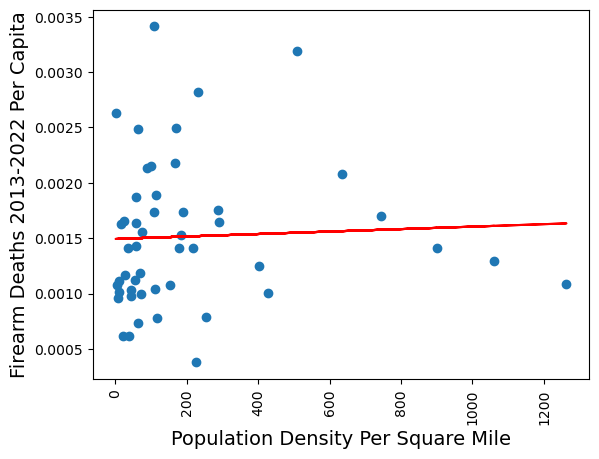

In [74]:
Merged_Data_David_Without_DC = Merged_Data_David.drop(8)
Crime_Data_Without_DC =Crime_Data.drop(8)

Merged_Data_David_Without_DC = Merged_Data_David_Without_DC.drop(38)
Crime_Data_Without_DC =Crime_Data_Without_DC.drop(38)

#We removed D.C because it's population density is so large that it disrupts the scatter plot and makes it more difficult
#to read. We also removed puerto rico as well. 

#Some of these dataframes ended up not being used as they were the result of an earlier phase of this project. 

y=State_Density_Kills_Poverty["Per Capita Gun Deaths"]
x=State_Density_Kills_Poverty["Population Density Per Square Mile"]
correlation = st.pearsonr(y,x)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
plt.scatter(x, y) 
plt.plot(x,regress_values, "r-")

plt.xlabel("Population Density Per Square Mile", size=14)
plt.ylabel("Firearm Deaths 2013-2022 Per Capita", size=14)

plt.xticks(rotation=90)
plt.show

print("The correlation is ",correlation)

In [55]:
Merged_Data_David_Without_DC["Less than high school graduate"]=Merged_Data_David_Without_DC.iloc[:,[3]].replace('\%','',regex=True).astype(float)
New_Series=Merged_Data_David_Without_DC["Less than high school graduate"]
New_Series

Merged_Data_David_Without_DC[["Less than high school graduate"]]

#We need to use regex to remove percentages from this column otherwise we would not be able to graph it.

,Less than high school graduate
0,13.4
1,13.2
2,14.7
3,11.5
4,9.5
5,12.3
6,9.0
7,12.4
9,13.2
10,14.3


The correlation is PearsonRResult(statistic=0.26276354592485907, pvalue=0.06814273765934241)


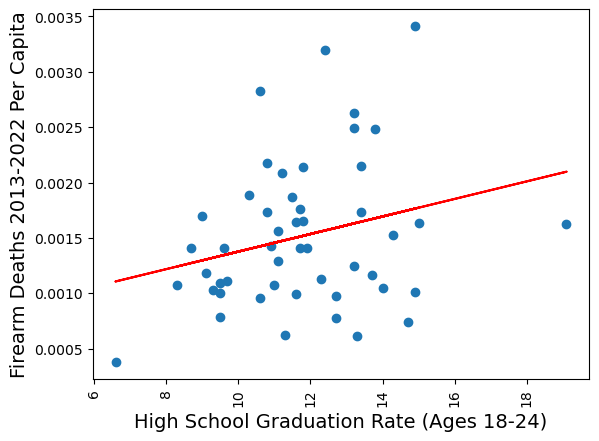

In [73]:
#Merged_Data_David_Without_DC["Less than high school graduate"]=Merged_Data_David_Without_DC.iloc[:,[3]].replace('\%','',regex=True).astype(float)

#Merged_Data_David_Without_DC = Merged_Data_David.drop(8)
#Crime_Data_Without_DC =Crime_Data.drop(8)


y=State_Density_Kills_Poverty["Per Capita Gun Deaths"]
x=New_Series
correlation = st.pearsonr(y,x)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
plt.scatter(x, y) 
plt.plot(x,regress_values, "r-")

plt.xlabel("High School Graduation Rate (Ages 18-24)", size=14)
plt.ylabel("Firearm Deaths 2013-2022 Per Capita", size=14)

plt.xticks(rotation=90)
plt.show
print("The correlation is",correlation)

#Given the P-Value we can be confident that high school graduation rate has no bearing on gun violence as a stand alone variable

In [30]:
Cleaned_Poverty_Data=pd.read_csv("Resources\Cleaned_Poverty_Data.csv")
Cleaned_Poverty_Data=Cleaned_Poverty_Data[["State","Poverty Percent, All Ages"]]
Cleaned_Poverty_Data
Data2Merge= pd.merge(Cleaned_Poverty_Data,Merged_Data_David[["State","Population Density Per Square Mile","Resident Population"]])
#We will look at poverty to give a more comprehensive look into the situations of these states.
#We also merged the poverty data, population density and gun lethalities data
State_Density_Kills_Poverty=pd.merge(Data2Merge, Crime_Data[["State","# Killed"]], on = "State")
State_Density_Kills_Poverty

,State,"Poverty Percent, All Ages",Population Density Per Square Mile,Resident Population,# Killed
0,Alabama,16.8,99.2,5024279.0,10818
1,Alaska,11.1,1.3,733391.0,1926
2,Arizona,14.1,62.9,7151502.0,5280
3,Arkansas,16.8,57.9,3011524.0,5628
4,California,12.8,253.7,39538223.0,31085
5,Colorado,9.7,55.7,5773714.0,6498
6,Connecticut,10.3,744.7,3605944.0,6124
7,Delaware,12.2,508.0,989948.0,3162
8,District of Columbia,16.1,11280.0,689545.0,6761
9,Florida,13.7,401.4,21538187.0,26838


In [31]:
State_Density_Kills_Poverty=State_Density_Kills_Poverty.drop(8)
State_Density_Kills_Poverty=State_Density_Kills_Poverty.reset_index(drop=True)
State_Density_Kills_Poverty["Per Capita Gun Deaths"]=State_Density_Kills_Poverty["# Killed"]/State_Density_Kills_Poverty["Resident Population"]
State_Density_Kills_Poverty
#We have merged these dataframes to make more visualizations. We also dropped DC because it isn't a state and also because
#it's population density skews the data 

,State,"Poverty Percent, All Ages",Population Density Per Square Mile,Resident Population,# Killed,Per Capita Gun Deaths
0,Alabama,16.8,99.2,5024279.0,10818,0.002153
1,Alaska,11.1,1.3,733391.0,1926,0.002626
2,Arizona,14.1,62.9,7151502.0,5280,0.000738
3,Arkansas,16.8,57.9,3011524.0,5628,0.001869
4,California,12.8,253.7,39538223.0,31085,0.000786
5,Colorado,9.7,55.7,5773714.0,6498,0.001125
6,Connecticut,10.3,744.7,3605944.0,6124,0.001698
7,Delaware,12.2,508.0,989948.0,3162,0.003194
8,Florida,13.7,401.4,21538187.0,26838,0.001246
9,Georgia,14.5,185.6,10711908.0,16389,0.001530


In [32]:

Sorted_State_Density_Kills=State_Density_Kills_Poverty.sort_values("Population Density Per Square Mile")
Sorted_State_Density_Kills

#State_Density_Kills_Poverty_Sorted=State_Density_Kills_Poverty.sort_values("# Killed")
#Top_6_By_pop_Full =Sorted_State_Density_Kills.iloc[[0,1,2,4,5,6,7,42,43,44,45,46,47,48,49]]
#Top_Three_By_Kills_Full_flipped = Top_Three_By_Kills_Full.transpose()

#Top_Three_By_Kills_Full_flipped.columns = Top_Three_By_Kills_Full_flipped.iloc[0]
#Top_Three_By_Kills_Full_flipped=Top_Three_By_Kills_Full_flipped.drop(["State"])

#Top_Three_By_Kills_Full_Ready= Top_Three_By_Kills_Full.set_index("State", inplace = True)
#Top_Bottom_Three_By_Kills =Sorted_State_Density_Kills.iloc[[0,1,2,3,4,45,46,47,48,49]]
#Top_Three_By_Kills =Sorted_State_Density_Kills.iloc[[0,1,2]]Top_Three_By_Kills_Full_Ready

#flipped4heatmap = Top_Bottom_Three_By_Kills.transpose()

#flipped4heatmap.columns = flipped4heatmap.iloc[0]
#flipped4heatmap=flipped4heatmap.drop(["State"])
#Top_Three_By_Kills.transpose()
#flipped4heatmapTop = Top_Three_By_Kills.transpose()

#flipped4heatmapTop.columns = flipped4heatmapTop.iloc[0]
#flipped4heatmapTop=flipped4heatmapTop.drop(["State"])


#Heat_Map_Ready 

Pop_bins = [0,55,120,250,11300]
labels_pop = ["Low Range (0-55)", "Mid Low Range (55-120)", "Mid High Range (120-250)","High Range (250-11300)"]
Sorted_State_Density_Kills["Population Density Range"] = pd.cut(Sorted_State_Density_Kills["Population Density Per Square Mile"],
                                                             Pop_bins,
                                                             labels = labels_pop)
ForBox_Sorted_State_Density_Kills=Sorted_State_Density_Kills[["# Killed","Population Density Range"]]
ForBox_Sorted_State_Density_Kills

,# Killed,Population Density Range
1,1926,Low Range (0-55)
48,621,Low Range (0-55)
25,1037,Low Range (0-55)
32,866,Low Range (0-55)
39,897,Low Range (0-55)
30,3438,Low Range (0-55)
11,1137,Low Range (0-55)
26,3240,Low Range (0-55)
27,3629,Low Range (0-55)
15,4144,Low Range (0-55)


<Axes: ylabel='Firearm Related Casualties'>

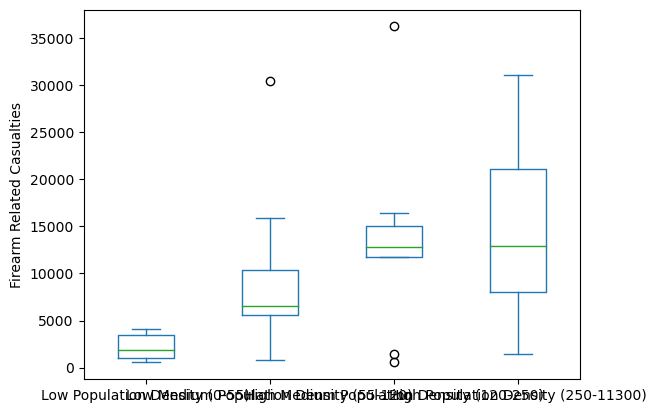

In [33]:
Low_Pop=ForBox_Sorted_State_Density_Kills[ForBox_Sorted_State_Density_Kills["Population Density Range"] == "Low Range (0-55)"]
Low_Mid_Pop=ForBox_Sorted_State_Density_Kills[ForBox_Sorted_State_Density_Kills["Population Density Range"] == "Mid Low Range (55-120)"]
High_Mid_Pop=ForBox_Sorted_State_Density_Kills[ForBox_Sorted_State_Density_Kills["Population Density Range"] == "Mid High Range (120-250)"]
High_Pop=ForBox_Sorted_State_Density_Kills[ForBox_Sorted_State_Density_Kills["Population Density Range"] == "High Range (250-11300)"]

Low_Pop=Low_Pop.pivot(columns='Population Density Range', values='# Killed')
Low_Mid_Pop=Low_Mid_Pop.pivot(columns='Population Density Range', values='# Killed')
High_Mid_Pop=High_Mid_Pop.pivot(columns='Population Density Range', values='# Killed')
High_Pop=High_Pop.pivot(columns='Population Density Range', values='# Killed')
Population_Brackets = pd.DataFrame({"Low Population Density (0-55)":Low_Pop["Low Range (0-55)"],
                                     "Low Medium Population Density (55-120)":Low_Mid_Pop["Mid Low Range (55-120)"],
                                     "High Medium Population Density (120-250)":High_Mid_Pop["Mid High Range (120-250)"],
                                     "High Population Density (250-11300)":High_Pop["High Range (250-11300)"]})
Population_Brackets.plot(ylabel="Firearm Related Casualties",kind = "box")


#After trying a box chart, we realized that any graph that measures just population density against gun violence wasn't going
#to be helpful due to the lack of correlation. Previously we had tried to calculate the P-Value and it was approxiomatly
#23, not nearly enough to confidently rule out a null hypothesis. So after some thought we decided that a graph that 
#measures three variable types would be best. For our purposes a bubble graph seemed to make the most sense

In [34]:
#indexed_State_Density_Kills = px.data.State_Density_Kill(indexed =True)
#We also tried a heat map. This is merely one of several itterations of it. After alot of thought the structure of the data
#we are looking at (three variables) simply isn't condusive to the best possible heat graph. So we also abandoned this in favor
#of a bubble graph. 
#heatmap = px.imshow(Top_Three_By_Kills_Full)
#heatmap.show()

NameError: name 'Top_Three_By_Kills_Full' is not defined

In [ ]:
State_Density_Kills_Poverty.head(5)

In [36]:
West_Coast =["California","Washington","Hawaii","Alaska","Oregon"]
West=["Wyoming","Nevada","Utah","Colorado","New Mexico","Montana","Idaho"]
Mid_West=["North Dakota","South Dakota","Nebraska","Kansas","Missouri","Iowa","Minnesota","Missouri"]
Great_Lakes=["Wisconsin","Illinois","Indiana","Ohio","Michigan"]
North_East=["New Jersey","New York","Pennsylvania","Maine","Vermont","New Hampshire","Rhode Island","Massachusetts","Connecticut"]
South=["Texas","Florida","Georgia","Virginia","West Virginia","Alabama","Mississippi","Tennessee","South Carolina","Kentucky"]

State_Density_Kills_Poverty["Region Color"]=""

for index,row in State_Density_Kills_Poverty.iterrows():
    if row["State"] in West_Coast:
        State_Density_Kills_Poverty.at[index,"Region Color"] ="purple"
    elif row["State"] in West:
        State_Density_Kills_Poverty.at[index,"Region Color"] ="pink"
    elif row["State"] in Mid_West:
        State_Density_Kills_Poverty.at[index,"Region Color"] ="cyan"
    elif row["State"] in Great_Lakes:
        State_Density_Kills_Poverty.at[index,"Region Color"] ="green"
    elif row["State"] in North_East:
        State_Density_Kills_Poverty.at[index,"Region Color"] ="blue"
    else:
        State_Density_Kills_Poverty.at[index,"Region Color"]="red"
State_Density_Kills_Poverty

#we added colors to the regions to see if we could see any relationships between regions and gun violence

,State,"Poverty Percent, All Ages",Population Density Per Square Mile,Resident Population,# Killed,Per Capita Gun Deaths,Region Color
0,Alabama,16.8,99.2,5024279.0,10818,0.002153,red
1,Alaska,11.1,1.3,733391.0,1926,0.002626,purple
2,Arizona,14.1,62.9,7151502.0,5280,0.000738,red
3,Arkansas,16.8,57.9,3011524.0,5628,0.001869,red
4,California,12.8,253.7,39538223.0,31085,0.000786,purple
5,Colorado,9.7,55.7,5773714.0,6498,0.001125,pink
6,Connecticut,10.3,744.7,3605944.0,6124,0.001698,blue
7,Delaware,12.2,508.0,989948.0,3162,0.003194,red
8,Florida,13.7,401.4,21538187.0,26838,0.001246,red
9,Georgia,14.5,185.6,10711908.0,16389,0.001530,red


The correlation is PearsonRResult(statistic=0.45029919426897225, pvalue=0.0011680764684018116)


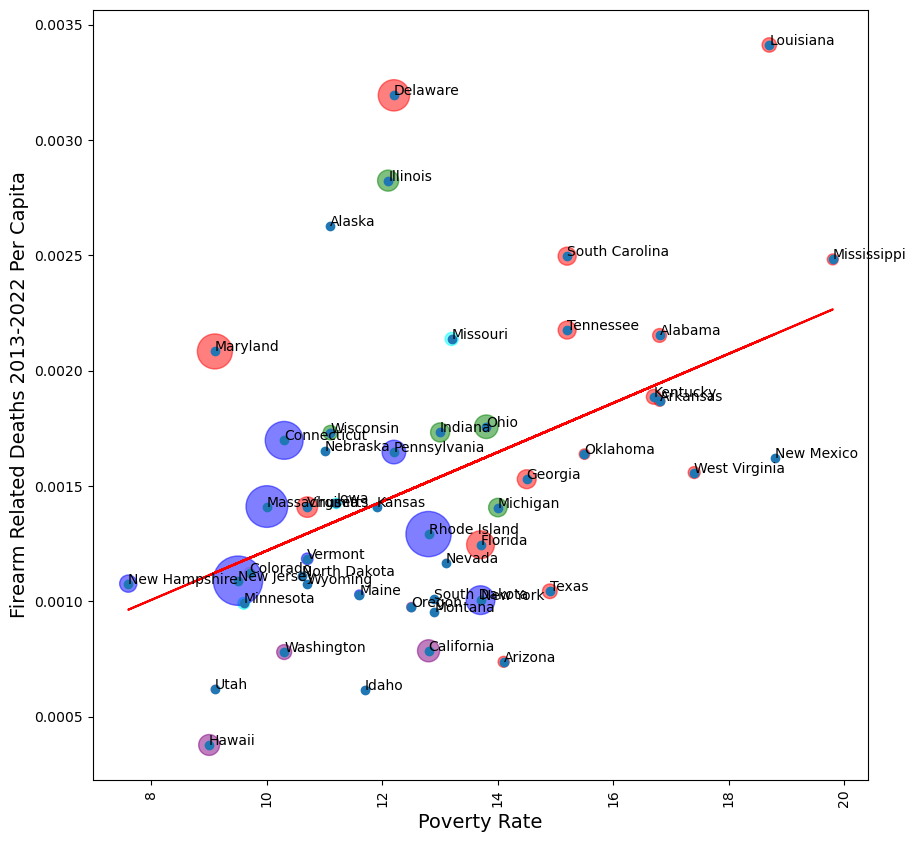

In [63]:
x=State_Density_Kills_Poverty["Poverty Percent, All Ages"]
y=State_Density_Kills_Poverty["Per Capita Gun Deaths"]
s=State_Density_Kills_Poverty["Population Density Per Square Mile"]
#s=Merged_Data_David_Without_DC["Less than high school graduate"]*150

Region_Color = State_Density_Kills_Poverty["Region Color"]

plt.figure(figsize=(10,10))

plt.scatter(x, y, s, alpha=0.5, c=State_Density_Kills_Poverty["Region Color"])
plt.xlabel("Poverty Rate", size=14)
plt.ylabel("Firearm Related Deaths 2013-2022 Per Capita", size=14)

for i,txt in enumerate(State_Density_Kills_Poverty["State"]):
    plt.annotate(txt,(x[i],y[i]))

correlation = st.pearsonr(y,x)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
plt.plot(x,regress_values, "r-")

plt.scatter(x, y) 


plt.xticks(rotation=90)
plt.show


print("The correlation is",correlation)


plt.show()
#The final graph is a bubble graph that shows the linear relationship between poverty and gun violence per capita.
#The size of the bubble reflects population density. There is a regression line that shows a strong relationship
#between poverty and gun deaths.